youtube: https://www.youtube.com/watch?v=pFiGSrRtaU4

collab: https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-instance-segmentation-on-custom-dataset.ipynb


https://github.com/ultralytics/ultralytics/blob/main/examples/object_counting.ipynb

[![Roboflow Notebooks](https://ik.imagekit.io/roboflow/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Instance Segmentation on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## ⚠️ Disclaimer

YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the blog post on how to train YOLOv8 Instance Segmentation, concurrently.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model
- Deploy the Trained Model to Roboflow

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

tutorial video https://www.youtube.com/watch?v=r7Am-ZGMef8&t=580s

install cuda https://developer.nvidia.com/cuda-downloads

check version of nvidia cpu https://developer.nvidia.com/cuda-gpus

install cudnn https://developer.nvidia.com/rdp/cudnn-archive

install pytorch https://pytorch.org/get-started/locally/

In [1]:
# install torch 1st before ultralytics or uninstall torch torchvision torchaudio then install this torch
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
import torch
print(torch.cuda.device_count())
print(torch.cuda.is_available())

Looking in indexes: https://download.pytorch.org/whl/cu121
1
True


In [2]:
!nvidia-smi

Wed Apr 10 15:01:33 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.78                 Driver Version: 551.78         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8              9W /   75W |     408MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

d:\datasci\datasciFinals\testing2


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **03.01.2024** with version **YOLOv8.0.196**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.1.41

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.41 🚀 Python-3.12.2 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
Setup complete ✅ (16 CPUs, 15.7 GB RAM, 585.3/953.9 GB disk)


In [5]:
import torch
print(torch.__version__) 

2.2.2+cu121


In [6]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [8]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

d:\datasci\datasciFinals\testing2


d:\datasci\datasciFinals\testing2\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Ultralytics YOLOv8.1.41 🚀 Python-3.12.2 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 d:\datasci\datasciFinals\testing2\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 146.0ms
Speed: 4.1ms preprocess, 146.0ms inference, 117.4ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs\segment\predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


d:\datasci\datasciFinals\testing2


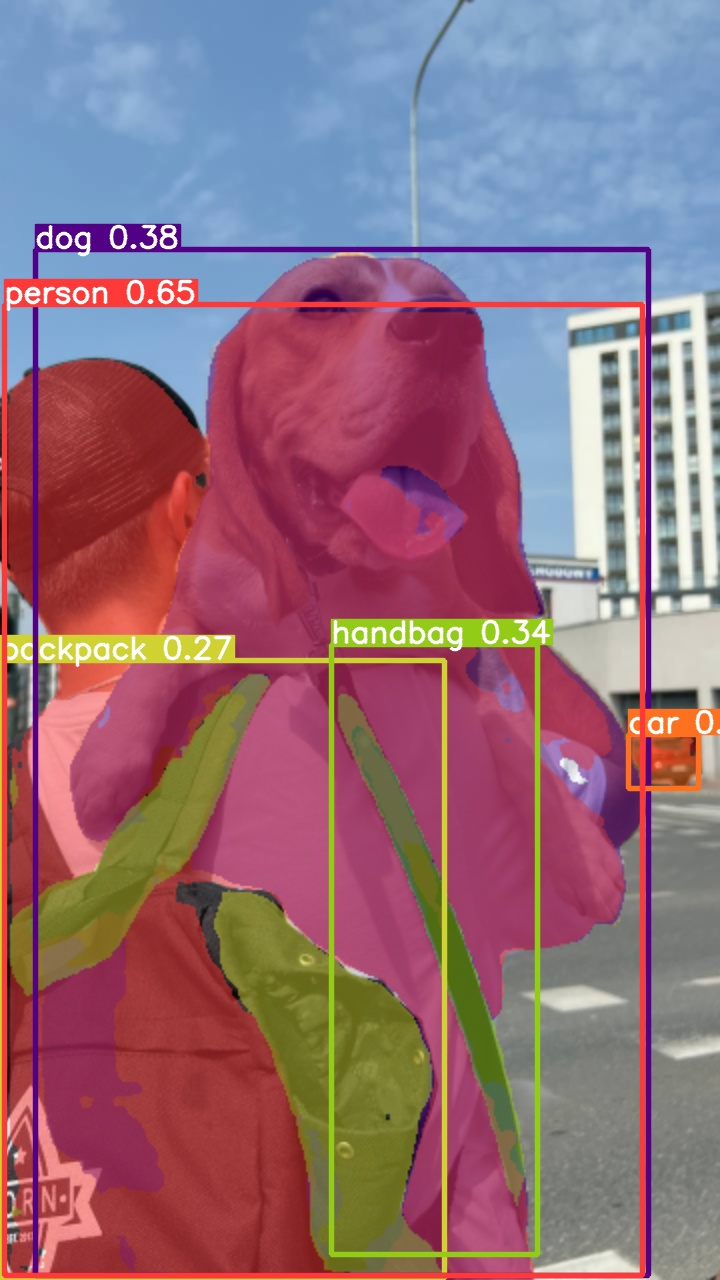

In [9]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [10]:
model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 d:\datasci\datasciFinals\testing2\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 161.4ms
Speed: 1.0ms preprocess, 161.4ms inference, 71.1ms postprocess per image at shape (1, 3, 640, 384)


In [11]:
results[0].boxes.xyxy

tensor([[4.4382e+00, 3.0429e+02, 6.4264e+02, 1.2755e+03],
        [6.2834e+02, 7.3451e+02, 6.9820e+02, 7.8832e+02],
        [3.5384e+01, 2.4991e+02, 6.4884e+02, 1.2759e+03],
        [3.3153e+02, 6.4432e+02, 5.3794e+02, 1.2545e+03],
        [8.9044e-01, 6.6046e+02, 4.4417e+02, 1.2785e+03]], device='cuda:0')

In [12]:
results[0].boxes.conf

tensor([0.6484, 0.5237, 0.3809, 0.3435, 0.2661], device='cuda:0')

In [13]:
results[0].boxes.cls

tensor([ 0.,  2., 16., 26., 24.], device='cuda:0')

In [14]:
results[0].masks

ultralytics.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0.,

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://ik.imagekit.io/roboflow/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src=""
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 4: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [15]:
home = os.getcwd()

# Specify the new directory name
new_folder_name = "datasets"

# Combine the home directory and new folder name
new_folder_path = os.path.join(home, new_folder_name)

# Create the new folder
try:
    os.mkdir(new_folder_path)

except Exception as e:
    # Catch more general exceptions
    print(f"An exception occurred: {e}")


An exception occurred: [WinError 183] Cannot create a file when that file already exists: 'd:\\datasci\\datasciFinals\\testing2\\datasets'


In [16]:
%cd {HOME}/datasets

d:\datasci\datasciFinals\testing2\datasets


In [17]:
!pip install roboflow
# change this block of code to my own key from roboflow site
from roboflow import Roboflow
rf = Roboflow(api_key="7TOUNOGktyjtdqfPTNef")
project = rf.workspace("paul-guerrie-tang1").project("asl-poly-instance-seg")
version = project.version(61)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.41, to fix: `pip install ultralytics==8.0.196`


## Custom Training

In [18]:
%cd {HOME}

d:\datasci\datasciFinals\testing2


In [19]:
# .yaml if data is the links to the data images
# .yaml if model is the layers structure without weights
# .pt if model is the weights only
# I changed the path in the data.yaml file for it to be detected
# the code below if for cli and it will note show the progress when running only when done so it is recommended to use the python code and more intuivite since you can see available parameters
# !yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=1 imgsz=640 

In [21]:
%cd {HOME}

# !yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640
# gpu is a neccesity if cpu it is untrainable because it takes very long not realistic
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data=rf"{dataset.location}/data.yaml", epochs=10, imgsz=640, workers =1 )
# worker 1 is neccessary or else it will just run without doing anything

d:\datasci\datasciFinals\testing2
Transferred 355/355 items from pretrained weights
New https://pypi.org/project/ultralytics/8.1.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.41 🚀 Python-3.12.2 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=d:\datasci\datasciFinals\testing2\datasets\ASL-Poly-Instance-Seg-61/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=1, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, sou

train: Scanning D:\datasci\datasciFinals\testing2\datasets\ASL-Poly-Instance-Seg-61\train\labels.cache... 2334 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2334/2334 [00:00<?, ?it/s]
val: Scanning D:\datasci\datasciFinals\testing2\datasets\ASL-Poly-Instance-Seg-61\valid\labels.cache... 334 images, 0 backgrounds, 0 corrupt: 100%|██████████| 334/334 [00:00<?, ?it/s]


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 1 dataloader workers
Logging results to runs\detect\train4
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.39G     0.6652      4.554      1.266         14        640: 100%|██████████| 146/146 [00:29<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.67it/s]

                   all        334        335      0.408      0.315      0.263      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.41G      0.572      3.411      1.146         14        640: 100%|██████████| 146/146 [00:27<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.01it/s]

                   all        334        335      0.476      0.626      0.611      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.41G     0.5344      2.716      1.089         14        640: 100%|██████████| 146/146 [00:26<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  5.04it/s]

                   all        334        335      0.625      0.728      0.764      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.41G     0.4906      2.176      1.044         14        640: 100%|██████████| 146/146 [00:26<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.96it/s]

                   all        334        335      0.737      0.766      0.836      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.41G     0.4621      1.847      1.024         14        640: 100%|██████████| 146/146 [00:27<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.87it/s]

                   all        334        335      0.803      0.792      0.883      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.41G      0.435      1.564      1.004         14        640: 100%|██████████| 146/146 [00:27<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.94it/s]

                   all        334        335      0.844      0.847      0.925      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.41G     0.4064      1.325     0.9779         14        640: 100%|██████████| 146/146 [00:28<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.88it/s]

                   all        334        335      0.894      0.904      0.965      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.41G      0.383      1.168     0.9552         14        640: 100%|██████████| 146/146 [00:28<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.83it/s]

                   all        334        335      0.941       0.89      0.961      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.41G     0.3536      1.058     0.9379         14        640: 100%|██████████| 146/146 [00:29<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.77it/s]

                   all        334        335      0.922      0.922      0.975      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.41G     0.3341     0.9662     0.9186         14        640: 100%|██████████| 146/146 [00:31<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  4.59it/s]

                   all        334        335      0.959      0.925      0.979      0.934



10 epochs completed in 0.087 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 6.3MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics YOLOv8.1.41 🚀 Python-3.12.2 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv8n summary (fused): 168 layers, 3010718 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.98it/s]


                   all        334        335      0.928      0.949      0.979      0.934
                     A        334         13        0.9      0.923      0.946      0.894
                     B        334         11      0.974          1      0.995      0.946
                     C        334         11      0.965          1      0.995      0.926
                     D        334          9      0.707          1      0.973      0.955
                     E        334         12      0.902          1      0.995      0.955
                     F        334          9          1      0.859      0.984      0.974
                     G        334          9      0.952          1      0.995      0.932
                     H        334          8      0.941      0.875      0.982      0.938
                     I        334         13       0.97          1      0.995      0.962
                     J        334         20          1      0.841      0.948      0.869
                     

In [28]:
# !ls {HOME}/runs/detect/train/
# commented since that is for collab 
# also change the subsequent code into detect from train folder
os.listdir(rf"{HOME}/runs/detect/train/")

['args.yaml',
 'confusion_matrix.png',
 'confusion_matrix_normalized.png',
 'F1_curve.png',
 'labels.jpg',
 'labels_correlogram.jpg',
 'PR_curve.png',
 'P_curve.png',
 'results.csv',
 'results.png',
 'R_curve.png',
 'train_batch0.jpg',
 'train_batch1.jpg',
 'train_batch2.jpg',
 'val_batch0_labels.jpg',
 'val_batch0_pred.jpg',
 'val_batch1_labels.jpg',
 'val_batch1_pred.jpg',
 'val_batch2_labels.jpg',
 'val_batch2_pred.jpg',
 'weights']

d:\datasci\datasciFinals\testing2


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


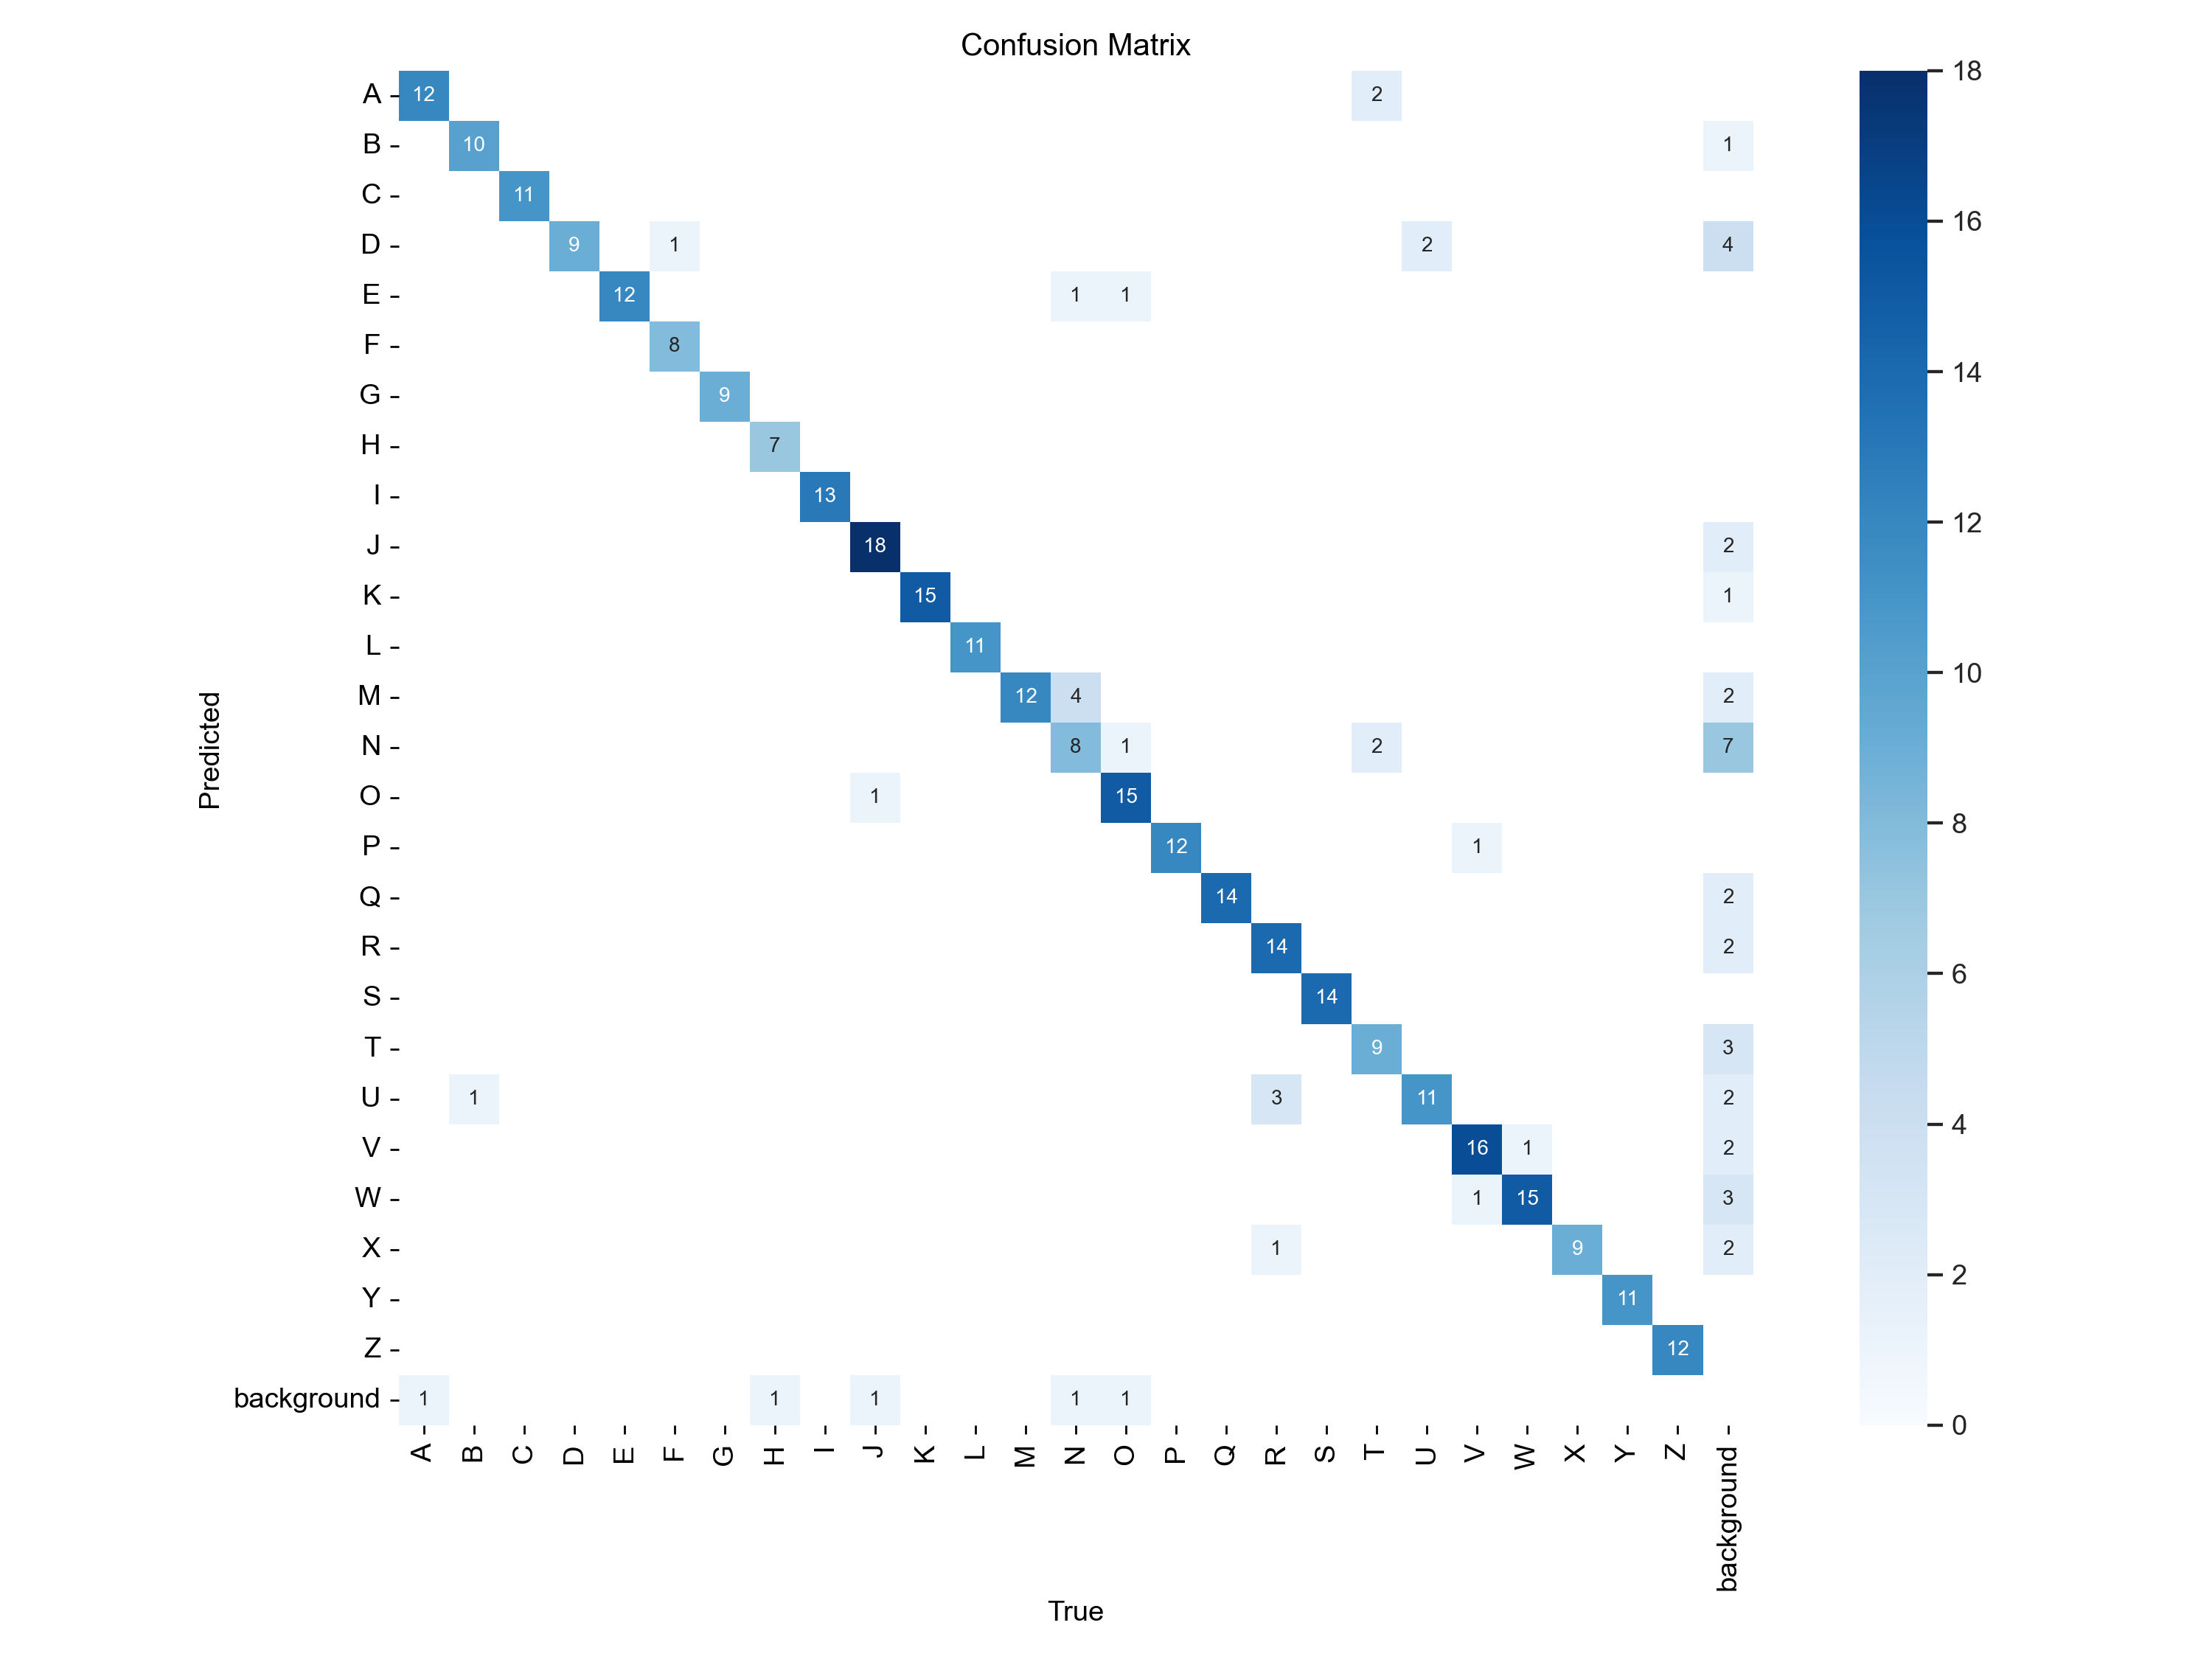

In [29]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

d:\datasci\datasciFinals\testing2


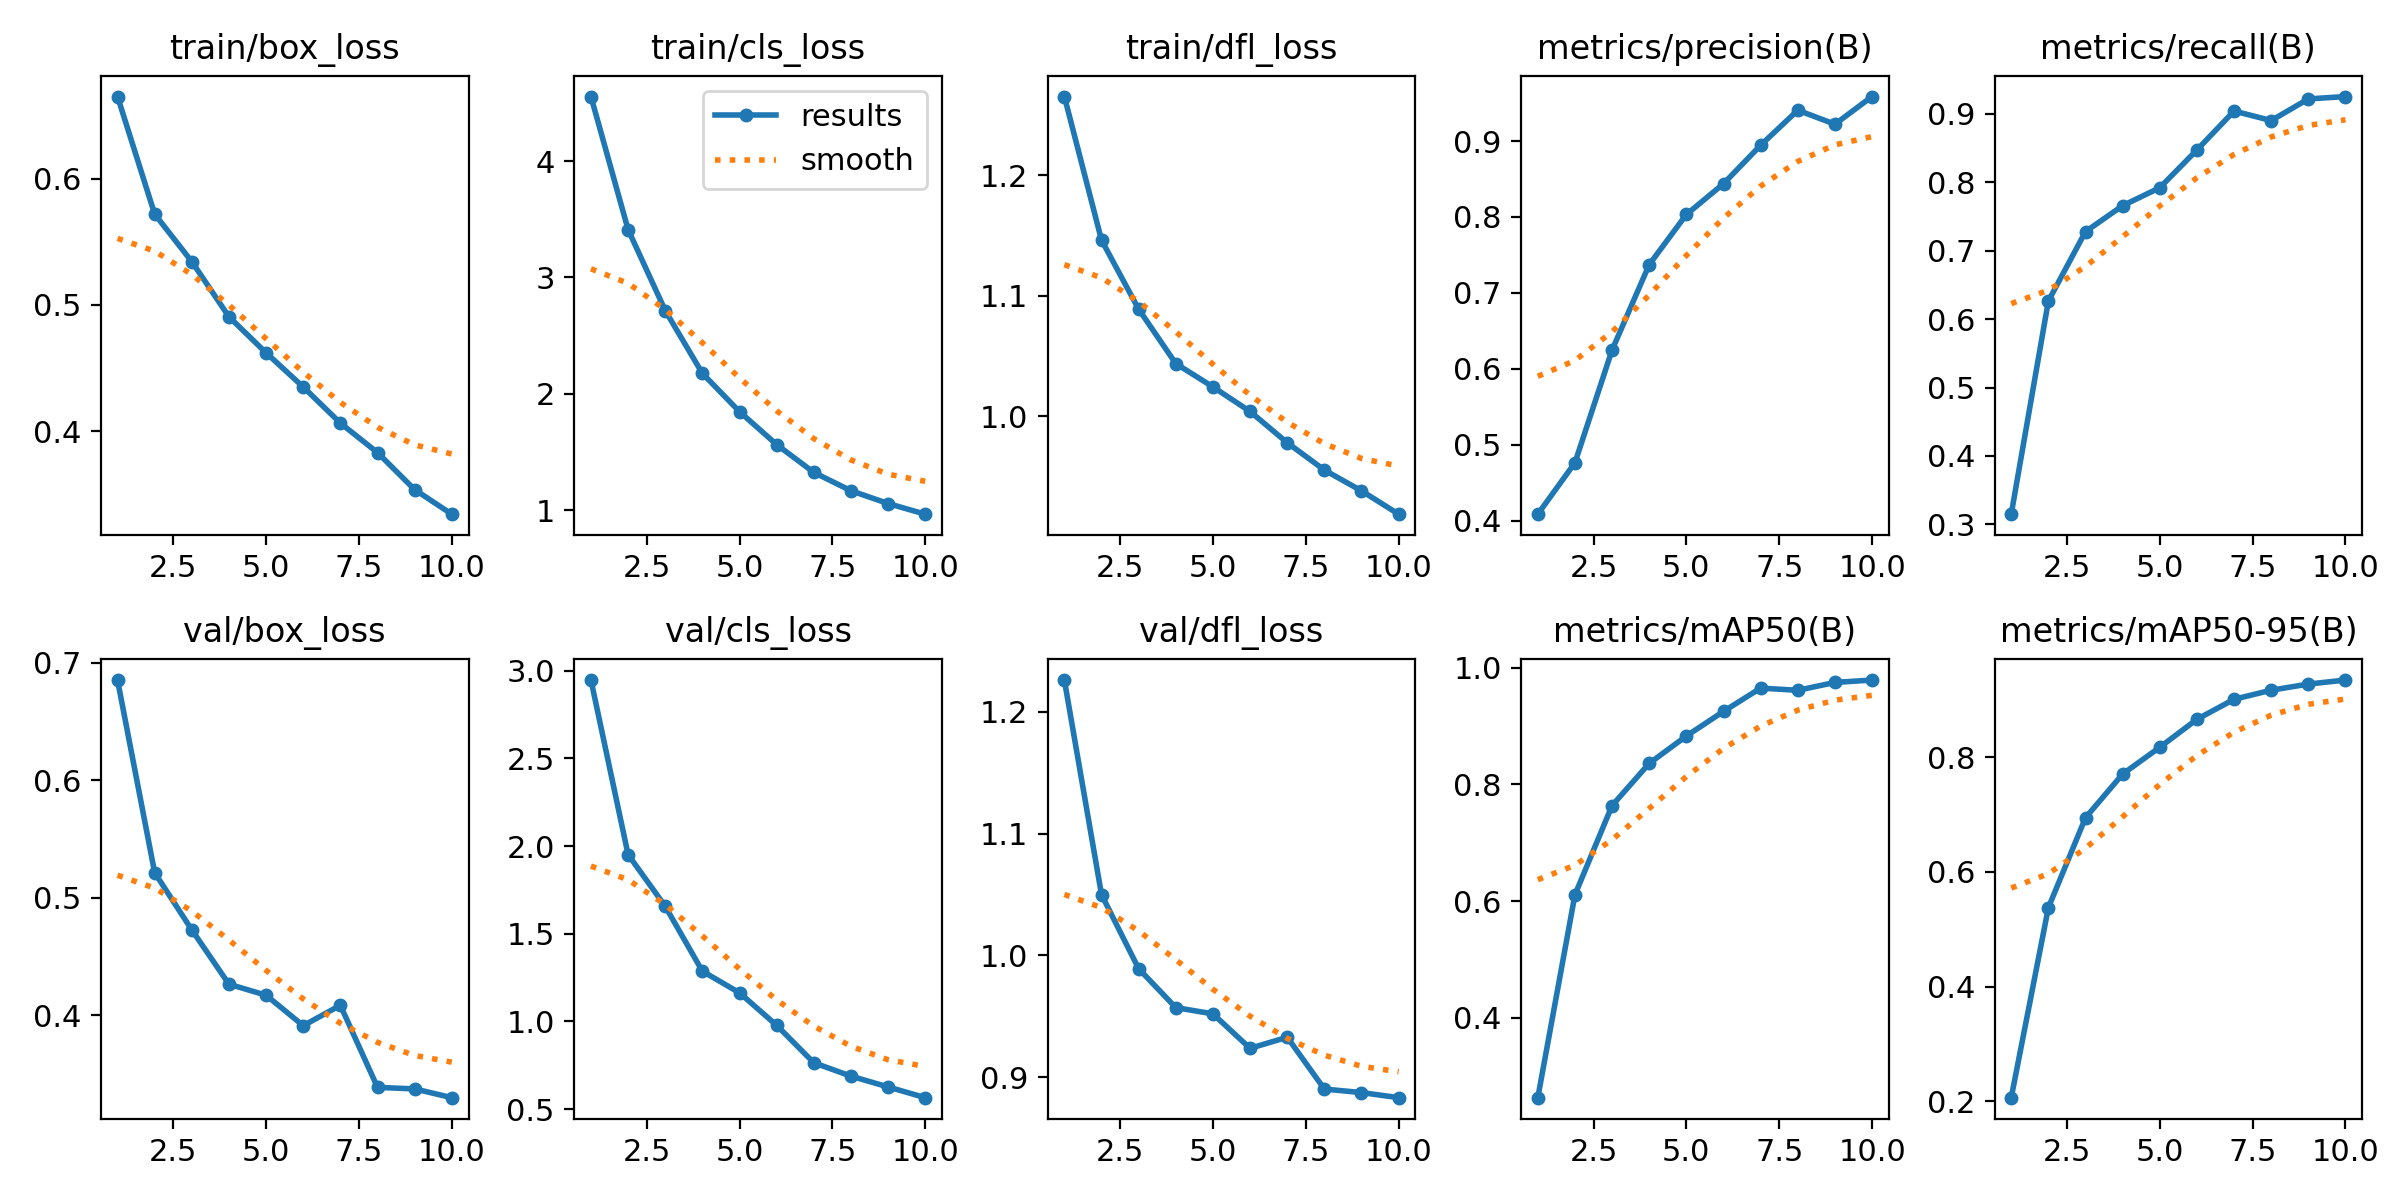

In [30]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

d:\datasci\datasciFinals\testing2


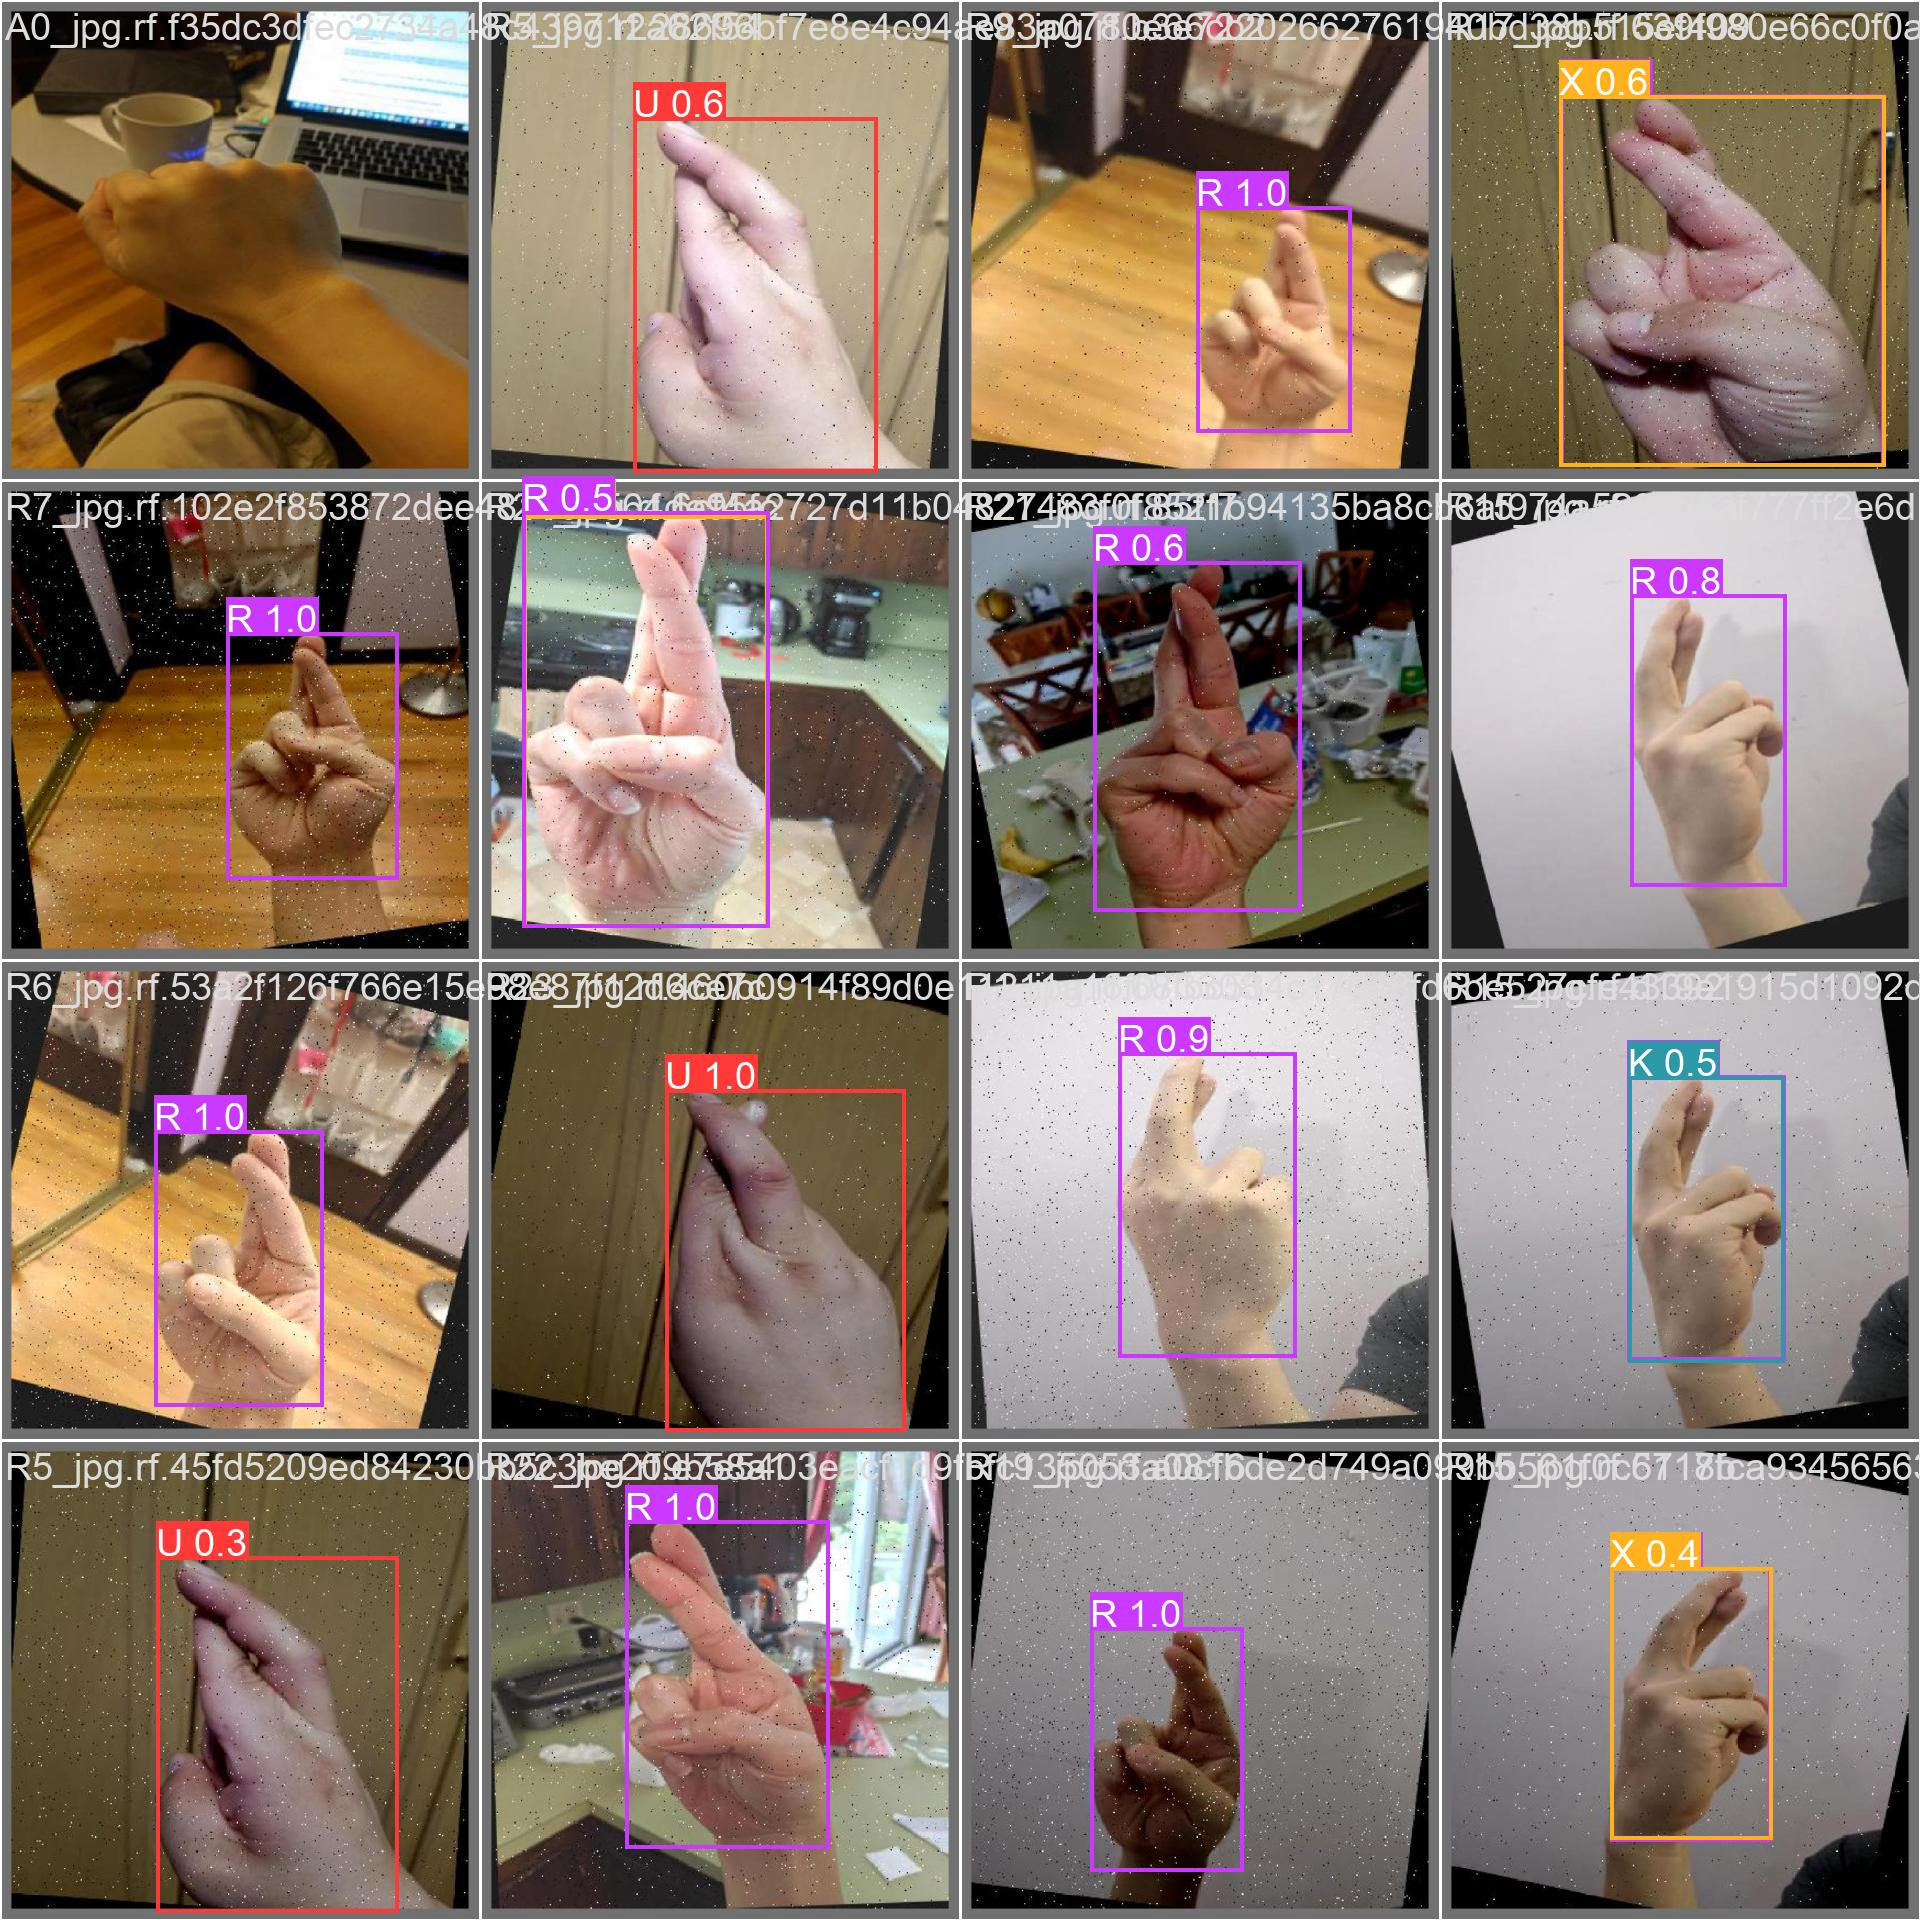

In [31]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [32]:
%cd {HOME}
#!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

metrics = model.val()  # no arguments needed, dataset and settings remembered


d:\datasci\datasciFinals\testing2
Ultralytics YOLOv8.1.41 🚀 Python-3.12.2 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv8n summary (fused): 168 layers, 3010718 parameters, 0 gradients


val: Scanning D:\datasci\datasciFinals\testing2\datasets\ASL-Poly-Instance-Seg-61\valid\labels.cache... 334 images, 0 backgrounds, 0 corrupt: 100%|██████████| 334/334 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.07it/s]


                   all        334        335      0.959      0.925      0.979      0.934
                     A        334         13       0.92      0.889      0.946      0.894
                     B        334         11      0.995          1      0.995      0.946
                     C        334         11      0.984          1      0.995      0.933
                     D        334          9      0.798          1      0.973      0.955
                     E        334         12      0.949          1      0.995      0.954
                     F        334          9          1       0.83      0.984      0.974
                     G        334          9       0.97          1      0.995      0.932
                     H        334          8      0.962      0.875      0.982      0.938
                     I        334         13      0.989          1      0.995      0.962
                     J        334         20          1      0.808      0.948      0.869
                     

array([    0.89407,     0.94558,     0.93262,     0.95533,     0.95356,     0.97431,     0.93195,      0.9377,     0.96225,     0.86928,     0.97049,     0.93319,     0.95657,     0.84807,     0.88318,     0.95428,     0.88053,     0.84509,     0.97353,     0.95832,     0.96706,     0.96702,     0.97993,     0.92845,
             0.932,      0.9555])

## Inference with Custom Model

In [57]:
%cd {HOME}
#!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source=fr'{HOME}/testImage1 (1).jpg' save=true

results = model(fr'{HOME}/testImage1 (1).jpg')
results[0].save()

d:\datasci\datasciFinals\testing2

image 1/1 d:\datasci\datasciFinals\testing2\testImage1 (1).jpg: 640x640 1 A, 61.0ms
Speed: 5.9ms preprocess, 61.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.


'results_testImage1 (1).jpg'

d:\datasci\datasciFinals\testing2


d:\datasci\datasciFinals\testing2\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


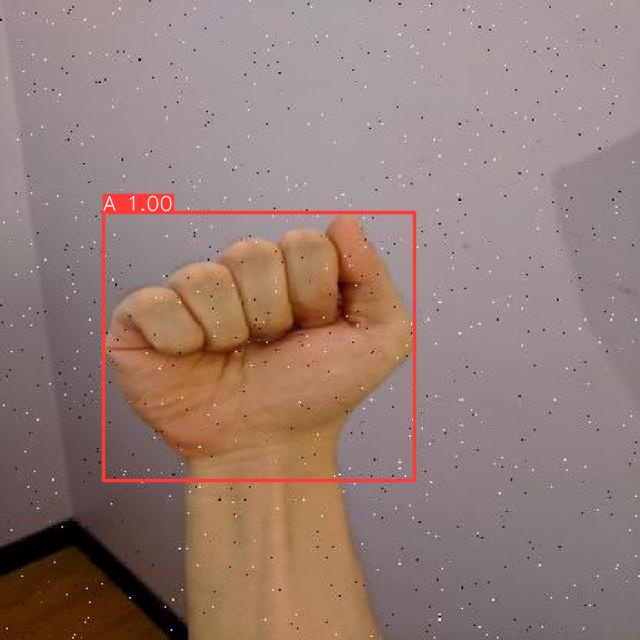

In [4]:
%cd {HOME}
Image(filename=f'{HOME}/results_testImage1 (1).jpg', width=600)

## Save & Deploy model

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload and your model weights to Roboflow Deploy for autolabeling, autoscaling inference, and using later.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) supports uploading YOLOv8 weights.

Run this cell to save your model weights:

In [59]:
# {HOME}\runs\detect\train\weights this is where the weights is save

# Deploy Your Model to the Edge

![Roboflow Inference banner](https://blog.roboflow.com/content/images/2023/08/banner.png)

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv8 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv8. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.